In [1]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')

[]

Classify articles of clothing from the Fashion MNIST datase

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


starting with train_images and train_labels, the former is like a question, latter is like the answer (also known as the label)
Using Matplotlib to plot what one of the images look like:

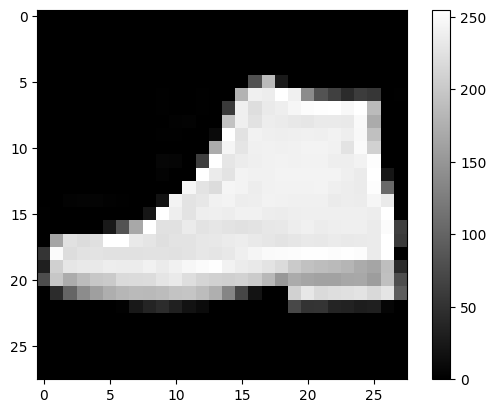

In [3]:
import matplotlib.pyplot as plt

# The question number to study with. Feel free to change up to 59999.
data_idx = 42

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

Categories:
Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot


In [4]:
train_labels[data_idx]

9

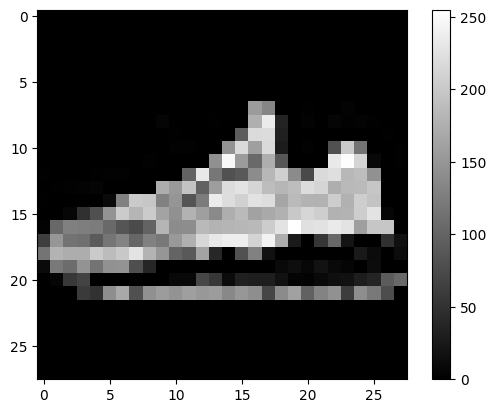

In [5]:
import matplotlib.pyplot as plt

# The question number to quiz with. Feel free to change up to 9999.
data_idx = 6174

plt.figure()
plt.imshow(valid_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
valid_labels[data_idx]

7

In [7]:
# 28 lists with 28 values each
valid_images[data_idx]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

 the output of y = mx + b is a number, but here, we're trying to classify different articles of clothing. How might we convert numbers into categories?

Here is a simple approach: we can make ten neurons, one for each article of clothing. If the neuron assigned to "Trousers" (label #1), has the highest output compared to the other neurons, the model will guess "Trousers" for the given input image.

Keras, a deep learning framework that has been integrated into TensorFlow, makes such a model easy to build. We will use the Sequential API, which allows us to stack layers, the list of operations we will be applying to our data as it is fed through the network.

In the below model, we have two layers:

Flatten - Converts multidimensional data into 1 dimensional data (ex: a list of lists into a single list).
Dense - A "row" of neurons. Each neuron has a weight (w) for each input. In the example below, we use the number 10 to place ten neurons.
We will also define an input_shape which is the dimensions of our data. In this case, our 28x28 pixels for each image.

In [8]:
number_of_classes = train_labels.max() + 1
number_of_classes

10

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes)
])

c:\Users\Aaron\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


To make sure our model has the structure we expect, we can call the summary method.

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Total parameter count is 7850
For each pixel there should be a weight for each of our ten classes

In [11]:
image_height = 28
image_width = 28

number_of_weights = image_height * image_width * number_of_classes
number_of_weights

7840

Our weights make up 7840,
the other 10 is each of the 10 neuron biases (the 'b' in y = mx + b)

In [13]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


loss function - used to grade performance of a model

SparseCategoricalCrossentropy:
Sparse - for this function, it refers to how our label is an integer index for our categories

Categorical - this function was made for classification

Cross-entropy - the more confident our model is when it makes an incorrect guess, the worse its score will be. If a model is 100% confident when it is wrong, it will have a score of negative infinity!

from_logits - the linear output will be transformed into a probability which can be interpreted as the model's confidence that a particular category is the correct one for the given input.

This type of loss function works well for our case because it grades each of the neurons simultaneously. If all of our neurons give a strong signal that they're the correct label, we need a way to tell them that they can't all be right.

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Evaluation:

An EPOCH is one review of the training dataset

After each epoch, the model is quizzed with the validation data

In [16]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=True,
    validation_data=(valid_images, valid_labels)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - accuracy: 0.8031 - loss: 10.0819 - val_accuracy: 0.7754 - val_loss: 13.6385
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 559us/step - accuracy: 0.8030 - loss: 9.9777 - val_accuracy: 0.8178 - val_loss: 10.0342
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - accuracy: 0.8094 - loss: 9.9278 - val_accuracy: 0.8198 - val_loss: 10.2312
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 536us/step - accuracy: 0.8120 - loss: 9.3192 - val_accuracy: 0.8039 - val_loss: 11.2560
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - accuracy: 0.8099 - loss: 9.3594 - val_accuracy: 0.7665 - val_loss: 12.0397


In [17]:
model.predict(train_images[0:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[  -13.087008,  -459.87057 ,   175.50838 ,   195.10223 ,
          -80.65031 ,   650.1079  ,   326.442   ,   621.85986 ,
          523.6923  ,   843.42633 ],
       [  371.84537 ,  -173.52    ,   308.08417 ,   221.22188 ,
           71.18271 , -1473.7776  ,   398.82217 , -2539.5854  ,
          108.91882 , -1105.5515  ],
       [  124.867294,   114.80489 ,   105.3132  ,   144.13806 ,
          127.92315 ,  -486.50714 ,   138.53677 ,  -600.2719  ,
           22.03806 ,  -339.28305 ],
       [  217.89786 ,   227.85272 ,   221.2762  ,   272.16968 ,
          188.50217 ,  -804.4993  ,   258.7978  , -1404.5463  ,
           47.898853,  -930.9984  ],
       [  258.80115 ,   368.2761  ,   233.10417 ,   317.18753 ,
          302.04886 , -1008.9729  ,   262.79904 , -1041.7861  ,
          112.31319 , -1051.353   ],
       [  321.96475 ,   200.48982 ,   496.68158 ,   316.0994  ,
          393.64847 ,  -856.07056 ,   428.63635 , -2057.7043  ,
          278.87784 , -1312.7294  ],
       [  

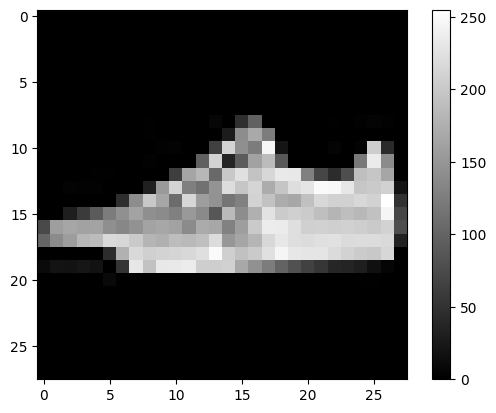

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


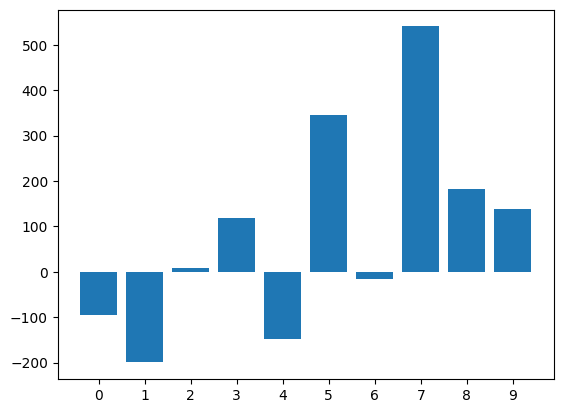

correct answer: 7


In [21]:
data_idx = 8677 # The question number to study with. Feel free to change up to 59999.

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(number_of_classes)
plt.figure()
plt.bar(x_values, model.predict(train_images[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print("correct answer:", train_labels[data_idx])